# PLN Clássico

Este notebook é uma introdução prática à PNL Clássica, isto é, técnicas de aprendizagem não profundas (deep learning) da PNL. Os tópicos abordados se alinham com as tarefas de PNL relacionadas aos vários estágios do pipeline de PNL: processamento de texto, exploração de texto, recursos de construção e tarefas em nível de aplicação.


## 1. Introdução ##


In [1]:
import nltk

# pode ser necessário fazer um download com o comando abaixo dependendo da instalação
# nltk.download()

#### Referência básica sobre expressão regular:
    Operador   Significado   Exemplo  Significado do Exemplo
    
    +          um ou mais    a+       olhe para 1 ou mais "a" caracteres 
    *          zero ou mais  a*       olhe para 0 ou mais "a" caracteres
    ?          opcional      a?       olhe para 0 ou 1 "a" caracteres
    []         escolha 1     [abc]    olhe para "a" ou "b" ou "c"
    [-]        intervalo     [a-z]    olhe para qualquer caractere entre "a" e "z"
    [^]        negação       [^a]     olhe para o caractere que não é um "a"
    ()         agrupamento   (a-z)+   olhe para um ou mais ocorrências de "a" e "z"
    (|)        ou operador   (ey|ax)  olhe para strings "ey" ou "ax"
    ab         seguimento    ab       olhe para um caractere "a" seguido por "b"
    ^          começo        ^a       olhe para o caractere "a" no começo da string/line
    $          fim           a$       olhe para um caractere "a" no final da string/line
    \s         whitespace    \sa      olhe para espaços em branco seguindo por "a"
    .          qualquer char a.b      olhe para um "a" seguido de qualquer char e "b"
    
Uso comuns:
   - re.search     encontra primeiro matching objeto
   - re.findall    encontra todos matching objetos
   - re.sub        substitua matches com uma string qualquer
    

In [2]:
import re

# search por um caractere singular
re.search("x", "uma ajuda extra")

<re.Match object; span=(11, 12), match='x'>

In [4]:
# busca por um single char
re.search("x", "um ajuda extra").group(0)

'x'

In [5]:
# encontra todas as ocorrências de qualquer caractere entre "a" e "z" 
re.findall("[a-z]", "R$825.33 no dinheiro.")

['n', 'o', 'd', 'i', 'n', 'h', 'e', 'i', 'r', 'o']

In [6]:
# encontra todas as ocorrências de qualquer "nome: ou "telefone"
re.findall("(nome|telefone):", "Meu nome: Geanderson, meu telefone: (312)555-1212")

['nome', 'telefone']

In [7]:
# encontra "gato", "gatos" ou "Gato", ou "Gatos"
re.findall("([Gg]ato)s?", "Der aos Gatos ou somente o gato.")

['Gato', 'gato']

In [8]:
# substitua todas palavras minúsculas com um "x"
re.sub("[a-z]", "x", "Ei.  Eu sei um pouco de regex agora...")

'Ex.  Ex xxx xx xxxxx xx xxxxx xxxxx...'

## 2. Processamento de Texto ##

Agora, vamos revisar algumas tarefas de processamento de texto.

In [3]:
import nltk

# carregamento das bases que vamos utilizar
nltk.download('gutenberg')
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('names')

# acesso a base de gutenberg
print("gutenberg book ids=", nltk.corpus.gutenberg.fileids())

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/geanderson/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /home/geanderson/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/geanderson/nltk_data...


gutenberg book ids= ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package names to /home/geanderson/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [4]:
# carrega palavras de "Alice in Wonderland"

alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
print("len(alice)=", len(alice))
print(alice[:100])

len(alice)= 34110
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [5]:
# carrega palavras de "Monty Python and the Holy Grail"

grail = nltk.corpus.webtext.words("grail.txt")
print("len(grail)=", len(grail))

print(grail[:100])

len(grail)= 16967
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in']


In [6]:
# NLTK exemplo: WORD segmentation

nltk.word_tokenize("o homem, ele correu por R$3.23 no dia 03/23/2016.")

['o',
 'homem',
 ',',
 'ele',
 'correu',
 'por',
 'R',
 '$',
 '3.23',
 'no',
 'dia',
 '03/23/2016',
 '.']

In [7]:
# NLTK exemplo: SENTENCE segmentation

nltk.sent_tokenize('O homem correu atrás.  A mesa estava lá atrás?  Sim logo lá!')

['O homem correu atrás.', 'A mesa estava lá atrás?', 'Sim logo lá!']

In [8]:
# exemplo de código: algoritmo simples para remover stopwords.
stoppers = "o é um a de para esse".split()

def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt

removeStopWords(stoppers, "esse é um teste para remover palavras stopwords.")

'teste remover palavras stopwords.'

In [9]:
# NLTK exemplo: removendo stopwords em inglês
from nltk.corpus import stopwords
stops = stopwords.words("english")

print("len(stops)=", len(stops))

removeStopWords(stops, "this is a test of the stop word removal code.")

len(stops)= 179


'test stop word removal code.'

In [10]:
# exemplo de código: removendo case
str = 'O homem correu atrás.  A mesa estava lá atrás?  Sim logo lá!'
str.lower()

'o homem correu atrás.  a mesa estava lá atrás?  sim logo lá!'

In [11]:
# NLTK exemplo: stemming

def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words
    
def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words    
    
str = "Please don't unbuckle your seat-belt while I am driving, he said"

print("porter:", stem_with_porter(str.split()))
print()
print("lancaster:", stem_with_lancaster(str.split()))


porter: ['pleas', "don't", 'unbuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving,', 'he', 'said']

lancaster: ['pleas', "don't", 'unbuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving,', 'he', 'said']


## 3. Exploração do Texto ##

In [12]:
# NLTK exemplo: análise de frequência
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

# texto de "Sense and Sensibility" por Jane Austen
raw = gutenberg.raw("austen-sense.txt")
fd_letters = FreqDist(raw)

words = gutenberg.words("austen-sense.txt")
fd_words = FreqDist(words)
sas = nltk.Text(words)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5)) 

fd_letters.plot(100)

<Figure size 2000x500 with 1 Axes>

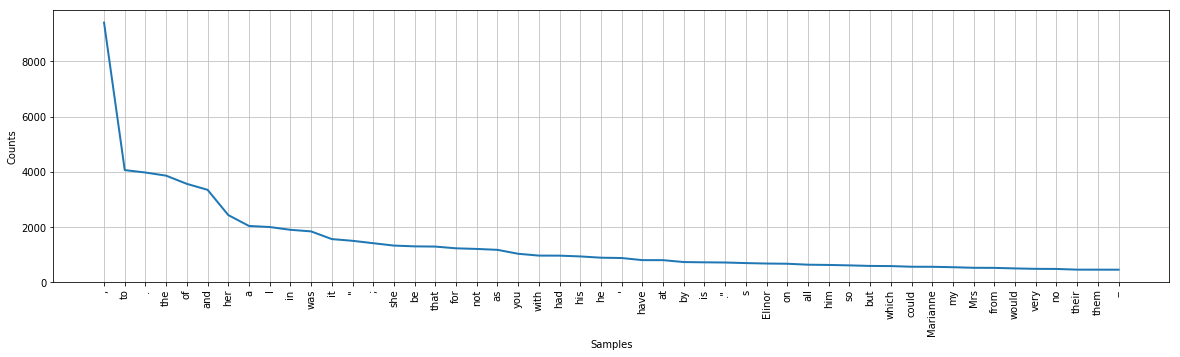

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5)) 

fd_words.plot(50)

In [14]:
# lista de colocações para "Sense and Sensibility"
sas.collocations() 

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [15]:
# vamos procurar por palavras grandes no texto
longWords = [w for w in set(words) if len(w) > 13]
longWords[:15]

['congratulating',
 'aggrandizement',
 'unexhilarating',
 'disapprobation',
 'disappointment',
 'representation',
 'unobtrusiveness',
 'irreconcilable',
 'thoughtfulness',
 'discrimination',
 'insignificance',
 'irreproachable',
 'inconsiderable',
 'insurmountable',
 'unpremeditated']

In [16]:
sas.concordance("affectionately")
print()

sas.concordance("correspondence")
print()

sas.concordance("dare")
print()


Displaying 2 of 2 matches:
before . She took them all most affectionately by the hand , and expressed gre
ed , took her hand , kissed her affectionately several times , and then gave w

Displaying 4 of 4 matches:
ould not be maintained if their correspondence were to pass through Sir John '
ve been Edward ' s gift ; but a correspondence between them by letter , could 
she had no doubt , and of their correspondence she was not astonished to hear 
e of Edward afforded her by the correspondence , for his name was not even men

Displaying 25 of 36 matches:
 not know what he was talking of , I dare say ; ten to one but he was light - 
l . The assistance he thought of , I dare say , was only such as might be reas
g , if I have plenty of money , as I dare say I shall , we may think about bui
, you will make conquests enough , I dare say , one way or other . Poor Brando
e . He is the curate of the parish I dare say ." " No , THAT he is not . He is
m . He was afraid of catching cold I dare say 

In [23]:
# vamos checar palavras similares a uma determinada palavra
sas.similar("affection")

attention time regard mother love heart opinion sister wishes wife
arrival marianne kindness family it marriage sisters sake conduct mind
